<a href="https://colab.research.google.com/github/CHU1226/Pandas/blob/main/side_projec1t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#side project 1
#1.題目：系所生源之分析報告
#2.內容：你是數據分析師，有一天某業主（某私校大學系主任）因為招生日益困難，因而委託你：做學生來源分析，根據入學高中學生（105，106，107三年）的歷史資料做數據分析，探討逐年變化，並調查有意就讀該系的潛在客戶落點所在，最後並做結案摘要報告
#3.使用技術：合併技術(concat,merge)，分群技術(groupby），樞紐分析表，交叉分析圖（groupby..agg..unstack)，視覺化(matplotlib)
#4.分析題目：28題
#5.學號：110AB0007
#6.姓名：林千惠
#7.學校系所：資財二甲

# 分析1：將三組不同的資料檔案，合併在同一DataFrame，df4
檔案：https://acupun.site/lecture/pandas/example/resource/students.xls

資料表：105級

106級

107級

In [ ]:
import pandas as pd
df = pd.read_excel("https://acupun.site/lecture/pandas/example/resource/students.xls","105級")
df2 = pd.read_excel("https://acupun.site/lecture/pandas/example/resource/students.xls","106級")
df3 = pd.read_excel("https://acupun.site/lecture/pandas/example/resource/students.xls","107級")
df4 = pd.concat([df,df2,df3], axis=0)
df4

,入學年份,名字,性別,畢業學校,入學管道
0,105,邱同學,女,高中1,轉學考試
1,105,李同學,女,高中2,轉學考試
2,105,呂同學,男,高中3,轉學考試
3,105,羅同學,男,高中2,轉學考試
4,105,蔣同學,男,高中4,甄選入學(繁星推薦)
...,...,...,...,...,...
49,107,陸同學,男,高中53,大學聯考/考試入學
50,107,吳同學,女,高中86,大學聯考/考試入學
51,107,林同學,女,高中37,外籍生申請入學
52,107,林同學,男,高中37,外籍生申請入學


# 分析2：入學年份的人數統計

In [ ]:
df4.groupby("入學年份").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})

,人數
入學年份,
105,50
106,41
107,54


# 分析3：安裝網頁中文字型

In [ ]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: import: command not found
--2023-06-13 11:55:28--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.193.138, 172.217.193.101, 172.217.193.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/map8qmk9eapbjeecdnlf77jj3emk84fu/1686657300000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=9e014bd3-dd06-435e-ae2d-d400f4755d28 [following]
--2023-06-13 11:55:31--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/map8qmk9eapbjeecdnlf77jj3emk84fu/1686657300000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=9e014bd3-dd06-435e-ae2d-d400f4755d28
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.26.132, 260

# 分析4：畫圖：入學年份的人數統計

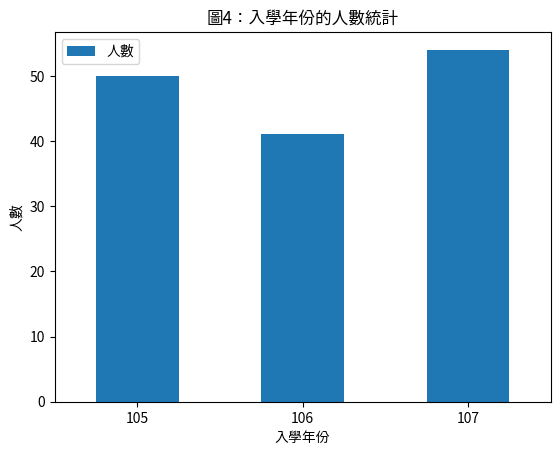

In [ ]:
import matplotlib.pyplot as plt
df4.groupby("入學年份").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .plot(kind="bar", legend=True, rot=0, title="圖4：入學年份的人數統計")
plt.xlabel("入學年份")
plt.ylabel("人數")
plt.show()

# 分析5：分析『不同年份，不同男女』人數，做樞紐分析表

In [ ]:
df5 = df4.groupby(["入學年份","性別"]).agg({"名字":"size"})\
    .unstack(level="入學年份")
df5.columns = [["人數","",""],["105年","106年","107年"]]
df5

人數          
   105年 106年 107年
性別               
女    34   19   24
男    16   22   30

# 分析6：分析『不同年份，不同男女』人數，做交叉分析圖

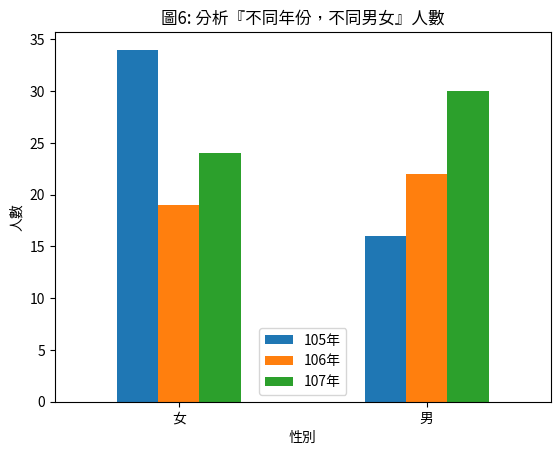

In [ ]:
df6 = df4.groupby(["入學年份","性別"]).agg({"名字":"size"})\
    .unstack(level="入學年份")
df6.columns = ["105年","106年","107年"]
df6.plot(kind="bar", legend=True, rot=0, title="圖6: 分析『不同年份，不同男女』人數")
plt.xlabel("性別")
plt.ylabel("人數")
plt.show()

# 分析7：分析來自不同『畢業學校』的人數，排序由到低

In [ ]:
df4.groupby("畢業學校").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)

,人數
畢業學校,
高中38,16
高中48,6
高中37,6
高中5,4
高中57,3
...,...
高中46,1
高中50,1
高中52,1


# 分析8：畫圖，呈現不同『畢業學校』的人數，排序由到低，畫出前15筆
使用figsize(x,y)參數，可以把圖形變化szie

例如：df5.plot(figsize=(12,4).....)

Text(0, 0.5, '人數')

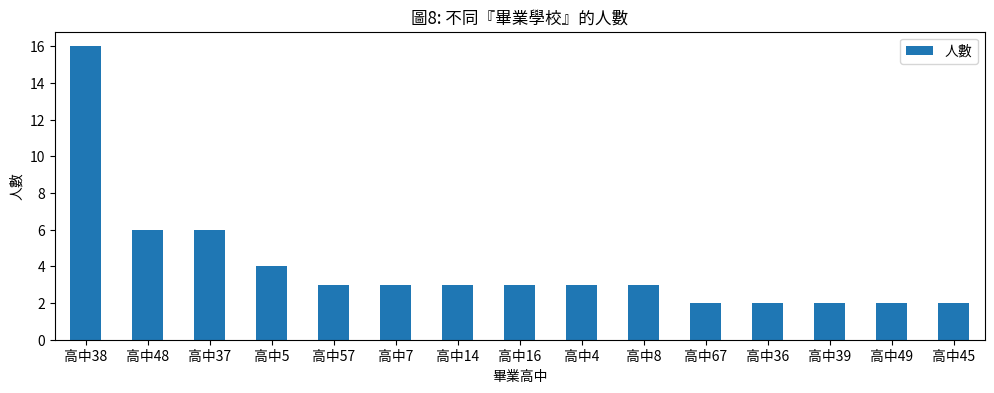

In [ ]:
df4.groupby("畢業學校").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)\
  .head(15)\
  .plot(kind="bar", legend=True, rot=0, title="圖8: 不同『畢業學校』的人數", figsize=(12,4))
plt.xlabel("畢業高中")
plt.ylabel("人數")

# 分析9：分析來自不同『畢業學校』的人數，排序由到低

In [ ]:
df4.groupby("入學管道").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)

,人數
入學管道,
大學聯考/考試入學,47
甄選入學(個人申請),43
交換生,16
轉學考試,12
甄選入學(繁星推薦),10
運動績優生,8
外籍生申請入學,6
身心障礙甄試,2
僑生分發,1


# 分析10：畫圖，呈現不同『入學管道』的人數，排序由到低，畫出前10筆
使用figsize(x,y)參數，可以把圖形變化szie

例如：df5.plot(figsize=(12,4).....)

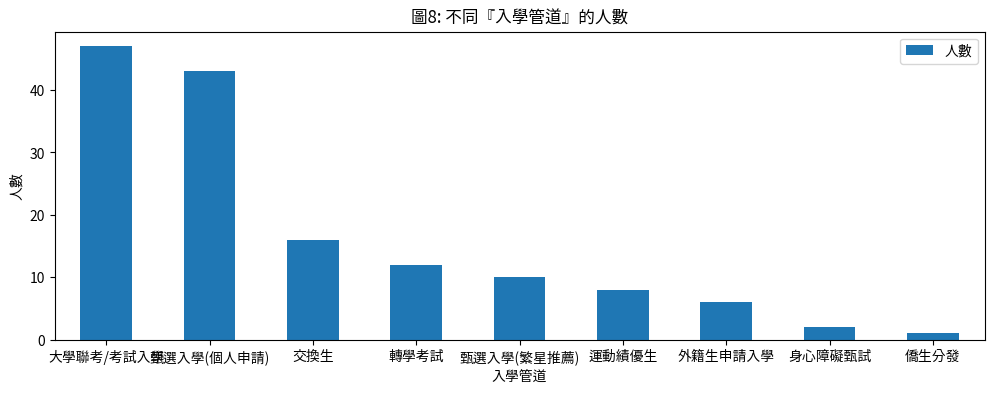

In [ ]:
df4.groupby("入學管道").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)\
  .plot(kind="bar", legend=True, rot=0, title="圖8: 不同『入學管道』的人數", figsize=(12,4))
plt.xlabel("入學管道")
plt.ylabel("人數")
plt.show()

# 分析11：用groupby來分析不同『入學年份，入學管道』人數(0位小數點)，做樞紐分析表，缺值填入0

In [ ]:
df7 = df4.groupby(["入學年份","入學管道"]).agg({"名字":"size"})\
    .unstack(level="入學年份")
df7.columns = [["","","人數"],["105年","106年","107年"]]
df7.fillna(0).style.set_precision(0)

<ipython-input-72-d8129fcc9b38>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df7.fillna(0).style.set_precision(0)


# 分析12：用pivot_table指令來分析不同『入學年份，入學管道』人數(0位小數點)，做樞紐分析表，缺值填入0

In [ ]:
df8 = df4.pivot_table(columns="入學年份", index="入學管道", values="名字", aggfunc="size")
df8.fillna(0).style.set_precision(0)

<ipython-input-73-089b5323edf8>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df8.fillna(0).style.set_precision(0)


入學年份,105,106,107
入學管道,,,
交換生,9,7,0
僑生分發,1,0,0
外籍生申請入學,2,1,3
大學聯考/考試入學,14,8,25
甄選入學(個人申請),12,12,19
甄選入學(繁星推薦),5,3,2
身心障礙甄試,0,0,2
轉學考試,4,7,1
運動績優生,3,3,2


# 分析13:分析『不同年份，不同入學管道』人數，做交叉分析圖，圖形設寬點(12,4)
使用figsize(x,y)參數，可以把圖形變化szie

例如：df5.plot(figsize=(12,4).....)

<ipython-input-74-83116d14253f>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df9.fillna(0).style.set_precision(0)


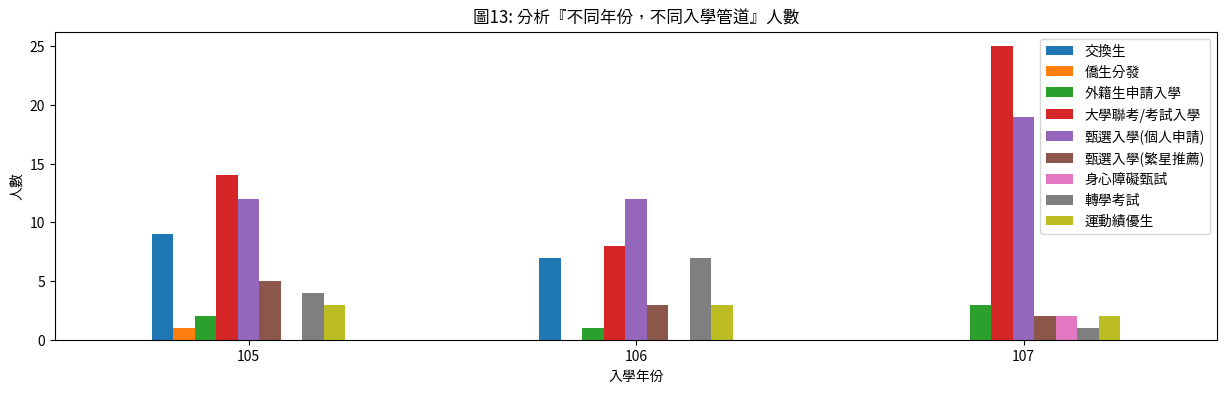

In [ ]:
df9 = df4.groupby(["入學年份","入學管道"]).agg({"名字":"size"})\
      .unstack(level="入學管道")
df9.columns = ["交換生","僑生分發","外籍生申請入學","大學聯考/考試入學","甄選入學(個人申請)","甄選入學(繁星推薦)","身心障礙甄試","轉學考試","運動績優生"]
df9.fillna(0).style.set_precision(0)
df9.plot(kind="bar", legend=True, rot=0, title="圖13: 分析『不同年份，不同入學管道』人數", figsize=(15,4))
plt.xlabel("入學年份")
plt.ylabel("人數")
plt.show()

# 分析14：請讀入另外一個資料表：students.xls, 學校地區表，df5

In [ ]:
import pandas as pd
df5 = pd.read_excel("https://acupun.site/lecture/pandas/example/resource/students.xls","學校地區表")
df5

,學校,縣市,地區
0,高中48,新竹市,桃竹苗
1,高中45,新竹市,桃竹苗
2,高中5,新竹市,桃竹苗
3,高中36,桃園市,桃竹苗
4,高中4,新竹市,桃竹苗
...,...,...,...
69,高中35,宜蘭縣,宜花東
70,高中34,宜蘭縣,宜花東
71,高中86,台東縣,宜花東
72,高中72,宜蘭縣,宜花東


# 分析15：請合併前面的df4,df5，結合成df6（合併方式以df4為準)

In [ ]:
df6 = df4.merge(df5, how="left", left_on="畢業學校", right_on="學校")
df6

,入學年份,名字,性別,畢業學校,入學管道,學校,縣市,地區
0,105,邱同學,女,高中1,轉學考試,高中1,新竹縣,桃竹苗
1,105,李同學,女,高中2,轉學考試,高中2,新竹縣,桃竹苗
2,105,呂同學,男,高中3,轉學考試,NaN,NaN,NaN
3,105,羅同學,男,高中2,轉學考試,高中2,新竹縣,桃竹苗
4,105,蔣同學,男,高中4,甄選入學(繁星推薦),高中4,新竹市,桃竹苗
...,...,...,...,...,...,...,...,...
140,107,陸同學,男,高中53,大學聯考/考試入學,高中53,宜蘭縣,宜花東
141,107,吳同學,女,高中86,大學聯考/考試入學,高中86,台東縣,宜花東
142,107,林同學,女,高中37,外籍生申請入學,NaN,NaN,NaN
143,107,林同學,男,高中37,外籍生申請入學,NaN,NaN,NaN


# 分析16：統計df6各欄位的缺值數

In [ ]:
df6.isnull().sum()\
  .reset_index()\
  .rename(columns={"index":"欄位",0:"缺值數"})

,欄位,缺值數
0,入學年份,0
1,名字,0
2,性別,0
3,畢業學校,0
4,入學管道,0
5,學校,33
6,縣市,33
7,地區,33


# 分析17：學生來自不同『縣市』的統計數量，排序高到低

In [ ]:
df6.groupby("縣市").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)

,人數
縣市,
桃園市,22
新竹市,20
苗栗縣,13
新北市,9
台南市,8
新竹縣,7
台中市,6
高雄市,5
宜蘭縣,5


# 分析18：畫圖：學生來自不同『縣市』的統計數量，排序高到低，前10筆
圖形設寬點(12,4)

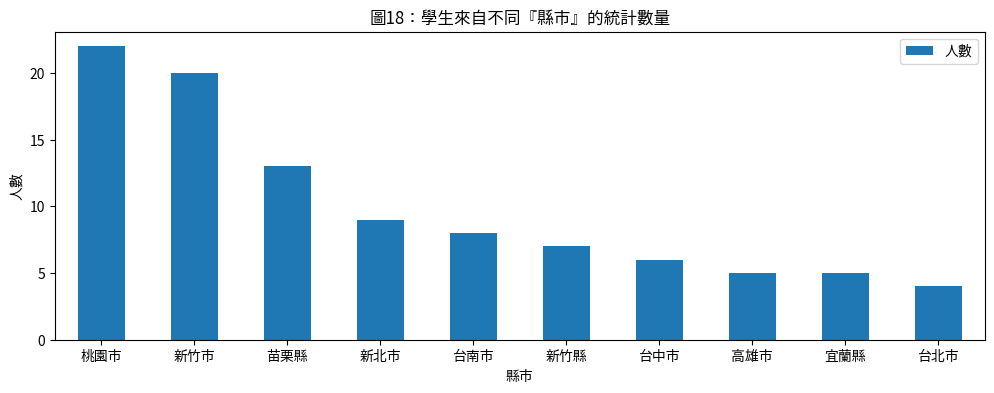

In [ ]:
df6.groupby("縣市").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)\
  .head(10)\
  .plot(kind="bar", legend=True, rot=0, title="圖18：學生來自不同『縣市』的統計數量", figsize=(12,4))

plt.xlabel("縣市")
plt.ylabel("人數")
plt.show()

# 分析19:學生來自不同『地區』的統計數量，排序高到低

In [ ]:
df6.groupby("地區").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)

,人數
地區,
桃竹苗,62
北北基,16
雲嘉南,10
中彰投,9
宜花東,7
高屏,7
澎金馬,1


# 分析20:畫圖：學生來自不同『地區』的統計數量，排序高到低
圖形設寬點(10,4)

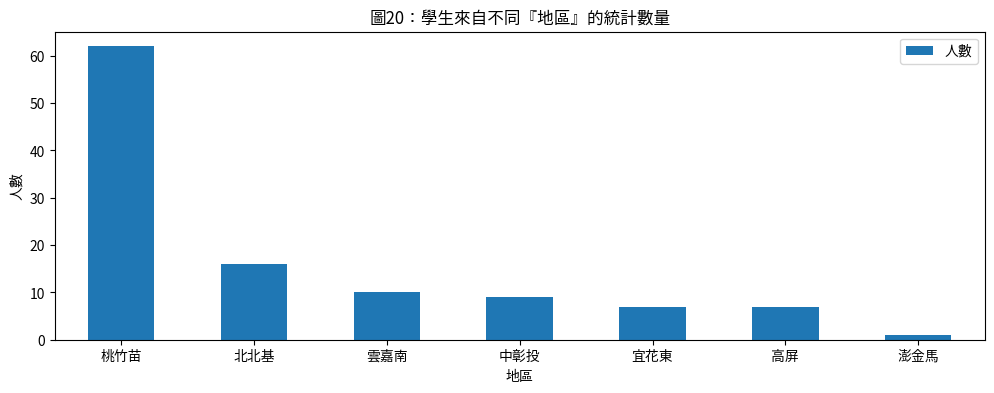

In [ ]:
df6.groupby("地區").agg({"名字":"size"})\
  .rename(columns={"名字":"人數"})\
  .sort_values("人數", ascending=False)\
  .plot(kind="bar", rot=0, legend=True, title="圖20：學生來自不同『地區』的統計數量", figsize=(12,4))

plt.xlabel("地區")
plt.ylabel("人數")
plt.show()

# 分析22：分析不同『入學年份，地區』的人數比較(0位小數點)，做樞紐分析表，缺值填入0，小數點0位

In [ ]:
df7 = df6.groupby(["入學年份","地區"]).agg({"名字":"size"})\
    .unstack(level="地區")\
    .rename(columns={"名字":"人數"},level=0)

df7.fillna(0).style.set_precision(0)

<ipython-input-7-f668791f02a5>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df7.fillna(0).style.set_precision(0)


# 分析23：畫圖，分析不同『入學年份，地區』的人數比較（水平軸=入學年份，缺值填入0
圖形設寬點(12,4)

<ipython-input-83-96fc0d48ddf0>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df8.fillna(0).style.set_precision(0)


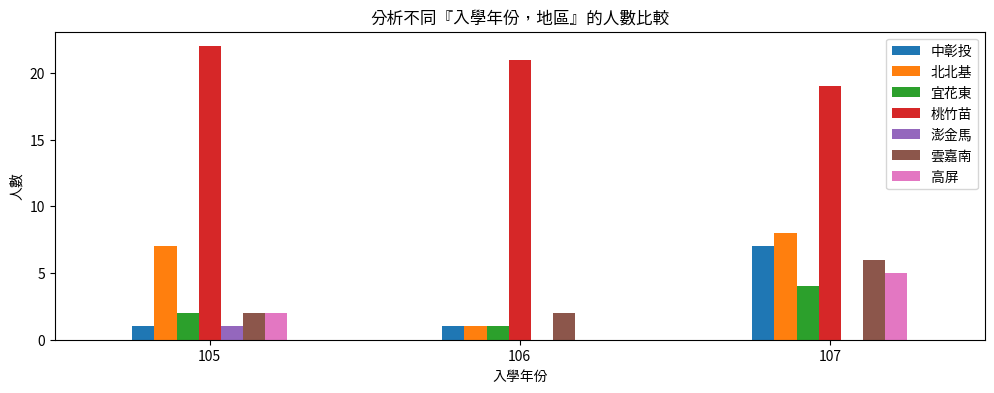

In [ ]:
df8 = df6.groupby(["入學年份","地區"]).agg({"名字":"size"})\
    .unstack(level="地區")
df8.columns = ["中彰投","北北基","宜花東","桃竹苗","澎金馬","雲嘉南","高屏"]
df8.fillna(0).style.set_precision(0)
df8.plot(kind="bar",rot=0,legend=True,title="分析不同『入學年份，地區』的人數比較",figsize=(12,4))
plt.xlabel("入學年份")
plt.ylabel("人數")
plt.show()

# 分析24：畫圖，分析不同『入學年份，地區』的人數比較（水平軸=地區，缺值填入0
圖形設寬點(12,4)

<ipython-input-84-92561ecfdb70>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df9.fillna(0).style.set_precision(0)


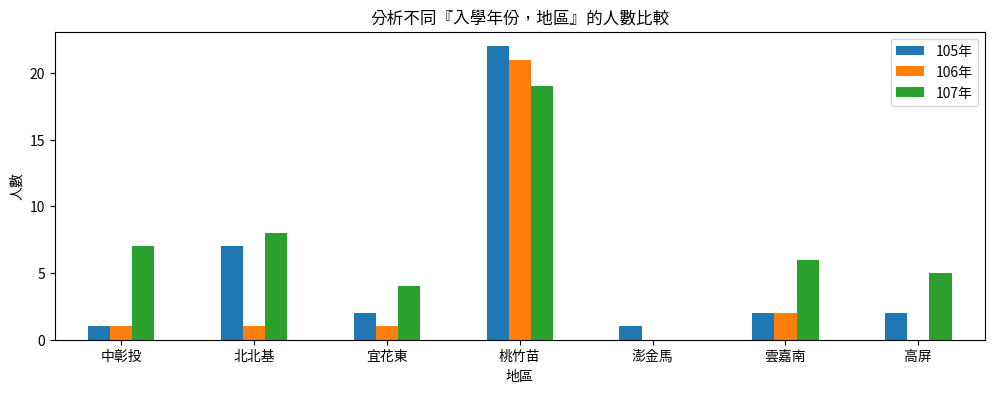

In [ ]:
df9 = df6.groupby(["入學年份","地區"]).agg({"名字":"size"})\
    .unstack(level="入學年份")
df9.columns = ["105年","106年","107年"]
df9.fillna(0).style.set_precision(0)
df9.plot(kind="bar",rot=0,legend=True,title="分析不同『入學年份，地區』的人數比較",figsize=(12,4))
plt.xlabel("地區")
plt.ylabel("人數")
plt.show()

# 分析25：結案報告：
#請根據上述的數據分析，告訴業主，
（1）其客戶群的潛在落點所在位置為何？逐年變化的影響效應？（強項分析）

（2）其客戶群較弱的所在落點位置為何？逐年變化的影響效應？（弱項分析）

（3）你如何建議業主，應該把招生資源該投入什麼方向，才能改善招生率

（4）其它建議業主的改善方案？（其它的文字建議意見，或自行用其他數據分析的方法）

# 結案摘要：
#（1）其客戶群的潛在落點所在位置為何？逐年變化的影響效應？（強項分析）

#（2）其客戶群較弱的所在落點位置為何？逐年變化的影響效應？（弱項分析）

#（3）你如何建議業主，應該把招生資源該投入什麼方向，才能改善招生率

#（4）其它建議業主的改善方案？（其它的文字建議意見，或自行用其他數據分析的技巧（不在上述24題內的解析）

In [ ]:
df7.columns = ["中彰投","北北基","宜花東","桃竹苗","澎金馬","雲嘉南","高屏"]
df7 = df7.fillna(0)
df7["各年份人數總和"] = df7.sum(axis=1)
df7.loc["各地區人數總和"] = df7.sum(axis=0)
(df7/df7.iloc[-1][-1]*100).round(2)

,中彰投,北北基,宜花東,桃竹苗,澎金馬,雲嘉南,高屏,各年份人數總和
入學年份,,,,,,,,
105,0.89,6.25,1.79,19.64,0.89,1.79,1.79,33.04
106,0.89,0.89,0.89,18.75,0.00,1.79,0.00,23.21
107,6.25,7.14,3.57,16.96,0.00,5.36,4.46,43.75
各地區人數總和,8.04,14.29,6.25,55.36,0.89,8.93,6.25,100.00


In [ ]:
(df7.div(df7["各年份人數總和"], axis=0)*100).round(2)

,中彰投,北北基,宜花東,桃竹苗,澎金馬,雲嘉南,高屏,各年份人數總和
入學年份,,,,,,,,
105,2.70,18.92,5.41,59.46,2.70,5.41,5.41,100.0
106,3.85,3.85,3.85,80.77,0.00,7.69,0.00,100.0
107,14.29,16.33,8.16,38.78,0.00,12.24,10.20,100.0
各地區人數總和,8.04,14.29,6.25,55.36,0.89,8.93,6.25,100.0


In [ ]:
a3 = df4.groupby(["畢業學校","入學年份"]).agg({"名字":"size"})\
    .unstack(level="入學年份")\
    .rename(columns={"名字":"人數"})\
    .fillna(0)
a3.columns = ["105年人數","106年人數","107年人數"]
a3["三年總入學人數"] = a3.sum(axis=1)
a4 = a3.sort_values("三年總入學人數", ascending=False)
a4.loc["各年度入學人數"] = a4.sum(axis=0)
(a4/a4.iloc[-1][-1]*100).round(2)

,105年人數,106年人數,107年人數,三年總入學人數
畢業學校,,,,
高中38,6.21,4.83,0.00,11.03
高中48,0.00,2.76,1.38,4.14
高中37,1.38,0.69,2.07,4.14
高中5,1.38,0.69,0.69,2.76
高中57,0.00,0.69,1.38,2.07
...,...,...,...,...
高中50,0.00,0.69,0.00,0.69
高中52,0.00,0.69,0.00,0.69
高中54,0.00,0.69,0.00,0.69


 （1）

*   各地區整體人數相比，客戶群的潛在落點位於桃竹苗55.36%。根據分析24的長條圖，桃竹苗入學人數逐年減少。
*   分析6『不同年份，不同男女』人數得知105年女生入學人數最多，但到107年為止男生逐年增加，並超過女生，因此從性別上來看潛在客戶群為男生。
*   分析8不同『畢業學校』的人數得知，從高中38畢業的人數最多。
*   分析13『不同年份，不同入學管道』人數得知，相較於其他入學管道，考試入學與徵選入學的人數在三年裡一直都佔據前一二，潛在客戶多為這兩種入學方式的學生。且徵選入學的學生有逐年增加的趨勢。



（2）

*   各地區整體人數相比，客戶群較弱的所在落點位於澎金馬0.89%。根據分析24的長條圖，澎金馬入學人數逐年減少，自106年起無人入學。
*   分析6『不同年份，不同男女』人數得知105年女生入學人數較多，但到106年開始少於男生，在107年的增幅不如男生，客戶群較弱的所在落點為女生。
*分析13『不同年份，不同入學管道』人數得知，在所有入學管道中，僑生分發的人數最少，且逐漸減少，從106年開始無人通過此管道入學。



（3）
*   根據客戶潛在落點我們建議招生地區以桃竹苗(人數最多)以及北北基、雲嘉南(逐年增加)這三個地區為主。
*   三年幒入學人數相比，從高中38畢業的人數最多11.03%，建議可以多前往高中38進行招生。
*   入學管道可以增加考試入學以及徵選入學的名額。

（4）從105到107年各年度入學人數的比例來看，原先佔比最多的桃竹苗59.46%減少至38.78%，第二高的北北基則從18.92%減至16.33%。而中南部的佔比逐漸上升，中彰投(2.7% ->14.29%)、雲嘉南(5.41% ->12.24%)、高屏(5.41% ->10.2%)。建議除了以桃竹苗為主以外，也要加強中南部的招生宣傳。

# 26.彩蛋題：新竹市所對應的高中有哪幾家？

In [ ]:
a1 = df6.groupby(["縣市","學校"]).size().reset_index()
a1[a1["縣市"] == "新竹市"]["學校"]\
  .to_frame()\
  .reset_index(drop=True)

,學校
0,高中27
1,高中28
2,高中4
3,高中45
4,高中48
5,高中5
6,高中6
7,高中9


#27.彩蛋題：入學管道為「甄選入學( 個人申請)」的畢業學校有哪些？

In [ ]:
a2 = df6.groupby(["入學管道","畢業學校"]).size().reset_index()
a2[a2["入學管道"] == "甄選入學(個人申請)"]["畢業學校"]\
  .to_frame()\
  .reset_index(drop=True)

,畢業學校
0,高中11
1,高中12
2,高中13
3,高中14
4,高中15
5,高中16
6,高中17
7,高中18
8,高中19
9,高中20


# 28.彩蛋題：哪個姓氏的學生人數最多?

In [ ]:
df6.groupby("名字").agg({"學校":"size"})\
  .reset_index()\
  .rename(columns={"學校":"人數"})\
  .sort_values("人數", ascending=False)\
  .head(1)

,名字,人數
56,陳同學,25
